<center><img src="https://javier.rodriguez.org.mx/itesm/2014/tecnologico-de-monterrey-blue.png" width="450" align="center"></center>
<br><p><center><h1><b>Analysis of Random Number Generation Methods</b></h1></center></p>
<p><center><h4>Course: <i>Stochastic Optimization (Group 652)</i></h4></center></p>
<p><center><h4>Instructed by:<i> Dra. Blanca Leticia Hernández Galván</i></h4></center></p>
<p style="text-align: right;">Thursday 29th, August, 2024</p>
<p style="text-align: right;">Alejandro Santiago Baca Eyssautier</p>

<br>

---

<p><h4> <b>Exercise 1</b> </h4></p> 

*Suppose you want to obtain a random decimal digit without using a computer. Which of the following methods would be appropriate? Justify your answer.*

<br>

**Answer**: d) Expose yourself to a Geiger counter near a source of radioactivity for one minute (protect yourself) and use the unit digit of the resulting count. Assume the Geiger counter displays the count in decimal notation and that the initial count is zero.

**Justification**: This method is the most appropriate because radioactivity follows a random decay process, and therefore, the number of observed counts should be random and uniformly distributed, ensuring an unbiased selection of digits. Unlike methods influenced by human bias, such as asking someone to pick a number, this approach avoids predisposition, providing a genuinely random result (Tversky & Kahneman, 1974).

Our answer is based on studies that have shown that radioactivity follows a Poisson distribution, where the variance equals the mean, which is consistent with the random and statistically uniform nature of radioactive events. Thus, using a Geiger counter for this purpose meets the requirements for reliably generating random numbers without bias (Knoll, 2010).

<br>

---

<p><h4> <b>Exercise 2</b> </h4></p> 

*In a random sequence of one million decimal digits, what is the probability that there will be exactly 100,000 of each possible digit?*

<br>

To calculate the probability that in a random sequence of one million decimal digits there will be exactly 100,000 of each possible digit (0-9), we can approach the problem in terms of combinatorics, using the concept of the number of favorable events over the total number of possible events.

- <u>Total Number of Possible Events:</u>

First, consider the total number of possible sequences of one million digits. Since each digit in the sequence can be any of the 10 digits (0-9), the total number of possible sequences is:

$$Possible\ Events =10^{1,000,000}$$

- <u>Number of Favorable Events:</u>

For there to be exactly 100,000 of each digit, we need to count how many different ways we can arrange 1,000,000 digits where there are 100,000 of each of the 10 digits. This is a combinatorial problem, and the number of ways to arrange this is given by the multinomial coefficient (Feller, 1968).

$$\frac{n!}{x_1! x_2! \cdots x_k!}$$

Substituting $n=1,000,000, x_i=100,000, k=10$

$$Favorable\ Events =\frac{1,000,000!}{100,000!^{10}}$$

- <u>Probability Calculation:</u>

The probability of obtaining exactly 100,000 of each digit is then the number of favorable events divided by the total number of possible events:

$$Probability = \frac{\frac{1,000,000!}{100,000!^{10}}}{10^{1,000,000}} = \frac{1,000,000!}{100,000!^{10}}\cdot \left( \frac{1}{10} \right) ^{1,000,000} $$

Although calculating the exact factorial of numbers this large is impractical, we can conceptualize that:

- *Total number of events*: $10^{1,000,000}$ is an extremely large number, representing all possible sequences of one million digits.
- *Number of favorable sequences*: $\frac{1,000,000!}{100,000!^{10}}$ is also an enormous number, but compared to $10^{1,000,000}$, it is much smaller.

Therefore, the probability that in a random sequence of one million digits there will be exactly 100,000 of each digit is extremely small. This is because, although there are many ways to arrange 1,000,000 digits into groups of 100,000 for each, the total number of possible sequences is so vast that the fraction of these sequences that meets the exact condition is minuscule.


---

<p><h4> <b>Exercise 3</b> </h4></p> 

*What number follows 1010101010 in the middle square method?*

<br>

1. Square $x_0 = 1010101010$, which has the structure of $2n$ digits with $n = 5$:
$$x_0^2 = 1010101010^2 = 1020304050403020100 $$
2. Since the original number has 10 digits, the next number in the sequence is obtained by taking the 10 middle digits from the resulting number. However, we need to add a 0 to the left to ensure it adheres to the rule of $4n$ digits.
$$x_{0\_filled}^2 = 01020304050403020100  $$
3. Extract the middle digits from the result:
$$x_1 = 3040504030 \Rightarrow v_1 =  .3040504030 $$

<br>

---

<p><h4> <b>Exercise 4</b> </h4></p> 

*Perform a complete examination of the middle square method in the case of two-digit decimal numbers. We can begin the process with any of the 100 possible values: 00, 01, ..., 99.*

In [1]:
def midsquare_method(seed, n_digits, iterations, repetition=True):
    random_numbers = []
    
    for _ in range(iterations):
        # Square the seed
        squared = seed ** 2
        
        # Convert the result to a text string and make sure it has enough leading zeros
        squared_str = str(squared).zfill(2 * n_digits)
        
        # Get the number of middle digits
        start_index = (len(squared_str) - n_digits) // 2
        end_index = start_index + n_digits
        middle_digits = squared_str[start_index:end_index]
        
        # Convert middle digits back to a number and update the seed
        seed = int(middle_digits)        
        decimal_seed = round(seed * 0.1 ** n_digits, n_digits)
        
        if not repetition:
            # If repetitions are not allowed, check if the number has already been generated
            if decimal_seed in random_numbers:
                break
        random_numbers.append(decimal_seed)
    
    return random_numbers

In [2]:
n_digits = 2
iterations = 150

# Store the list of values ​​for each seed until a repetition occurs
cycles = {}

# Iterate over all possible seeds
for seed in range(100):
    random_numbers = midsquare_method(seed, n_digits, iterations, repetition=False)
    
    # Store the list of values ​​for the current seed
    cycles[seed] = random_numbers

# Dictionary to store the number of cycles ending in each final value
final_values = {}

# Iterate over the cycles to count the number of cycles ending at each final value
for seed, random_numbers in cycles.items():
    final_value = random_numbers[-1]
    if final_value not in final_values:
        final_values[final_value] = [seed]
    else:
        final_values[final_value].append(seed)
        
# Print the different values
for final_value, seeds in final_values.items():
    print(f'Final value: {final_value}, seeds: {seeds}')

Final value: 0.0, seeds: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 21, 25, 27, 28, 29, 31, 32, 33, 36, 37, 38, 41, 42, 43, 44, 45, 46, 54, 55, 56, 58, 61, 62, 63, 64, 68, 69, 71, 72, 73, 75, 76, 77, 78, 81, 82, 84, 87, 89, 91, 92, 93, 95, 96]
Final value: 0.1, seeds: [10, 15, 22, 23, 26, 30, 34, 35, 39, 48, 52, 59, 65, 66, 67, 70, 85, 86, 90]
Final value: 0.6, seeds: [20, 40, 47, 49, 51, 53, 60, 74, 80, 83, 88, 94, 97, 98, 99]
Final value: 0.24, seeds: [24]
Final value: 0.5, seeds: [50]
Final value: 0.57, seeds: [57, 79]


<br>

- $\quad$ a) <i>How many of these values ​​eventually lead to the repeating cycle 00, 00, ...?</i>

In [14]:
print('a) Number of cycles that lead to en 00:', len(final_values[0.0]), 
      '\n   Seeds:', final_values[0.0])

a) Number of cycles that lead to en 00: 62 
   Seeds: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 21, 25, 27, 28, 29, 31, 32, 33, 36, 37, 38, 41, 42, 43, 44, 45, 46, 54, 55, 56, 58, 61, 62, 63, 64, 68, 69, 71, 72, 73, 75, 76, 77, 78, 81, 82, 84, 87, 89, 91, 92, 93, 95, 96]


<br>

- $\quad$ $b_1$) <i>How many possible final cycles exist?</i>

In [4]:
print('b) Number of possible final cycles:', len(final_values), 
      '\n   Values: ', list(final_values.keys()))

b) Number of possible final cycles: 6 
   Values:  [0.0, 0.1, 0.6, 0.24, 0.5, 0.57]


<br>

However, it is important to note that it seems that 2 of these seeds lead to the same cycle, albeit inverted. These are the following:

In [15]:
print('Mid square method with seed 24:', midsquare_method(24, 2, 10))
print('Mid square method with seed 57:', midsquare_method(57, 2, 10))

Mid square method with seed 24: [0.57, 0.24, 0.57, 0.24, 0.57, 0.24, 0.57, 0.24, 0.57, 0.24]
Mid square method with seed 57: [0.24, 0.57, 0.24, 0.57, 0.24, 0.57, 0.24, 0.57, 0.24, 0.57]


<br>

We notice that both contain 2 unique values, 0.57 and 0.24. However, we think that these should be considered different cycles because if we were interested in calculating the value obtained at position $i$ of the mean square method with both seeds, we would obtain different results.

<br>

- $\quad$ $b_2$) <i>Which is the longest cycle? </i>

In [6]:
print('b) Length of longest cycle:', max(len(cycle) for cycle in cycles.values()), 
      '\n   Cycle:', max(cycles.values(), key=len),
      '\n   Seed:', max(cycles, key=lambda x: len(cycles[x])))

b) Length of longest cycle: 14 
   Cycle: [0.76, 0.77, 0.92, 0.46, 0.11, 0.12, 0.14, 0.19, 0.36, 0.29, 0.84, 0.05, 0.02, 0.0] 
   Seed: 42


<br>

- $\quad$ c) <i>What initial value or values ​​will give the greatest number of distinct elements before the sequence repeats? </i>

This question is, in our opinion, redundant with the previous one. Since the seed with the longest cycle will also be the one that will give the greatest number of unique elements before the sequence repeats. Therefore, we are interested in knowing if there are other seeds, besides seed 42, that produce equally long cycles.

In [7]:
print('c) Seeds with the maximum cycle length (14):',
        [seed for seed, cycle in cycles.items() if len(cycle) == 14])

c) Seeds with the maximum cycle length (14): [42, 69]


<br>

---

<p><h4> <b>Exercise 5</b> </h4></p> 

<i> In the linear congruential method, the sequence obtained when $m = 10$ and $X_0 = a = c = 7$ is $7, 6, 9, 0, 7, 6, 9, 0, \ldots$. As this example shows, the sequence is not always ‘random’ for all choices of $m, a, c,$ and $X_0$, and it happens that $X_4 = X_0$, so the sequence begins again from the start. Verify that this statement holds. Give an example of a linear congruential sequence with $m = 10$ where $X_0$ never reappears in the sequence. </i>

<br>

The formula for the linear congruential method is:

$$X_{n+1} = (a \cdot X_n + c) \mod m$$

<br>

1. Let's manually verify the statement for the linear congruential method with the following values:
    * $m = 10$
    * $a = 7$
    * $c = 7$
    * $X_0 = 7$

- Procedure:

    * Calculate $ X_1 $ $$X_1 = (7 \cdot 7 + 7) \mod 10 = 56 \mod 10 = 6$$
    * Calculate $ X_2 $ $$X_2 = (7 \cdot 6 + 7) \mod 10 = 49 \mod 10 = 9$$
    * Calculate $ X_3 $ $$X_3 = (7 \cdot 9 + 7) \mod 10 = 70 \mod 10 = 0$$
    * Calculate $ X_4 $ $$X_4 = (7 \cdot 0 + 7) \mod 10 = 7 \mod 10 = 7$$
    - Calculate $ X_5 $ $$X_5 = (7 \cdot 7 + 7) \mod 10 = 56 \mod 10 = 6$$
    - Calculate $ X_6 $ $$X_6 = (7 \cdot 6 + 7) \mod 10 = 49 \mod 10 = 9$$
    - Calculate $ X_7 $ $$X_7 = (7 \cdot 9 + 7) \mod 10 = 70 \mod 10 = 0$$

    We observe that $ X_7 = X_4 = X_0 = 7 $, meaning that the sequence repeats and will restart from $ X_0 = 7 $. This demonstrates that for these values, the sequence is not "random" in the traditional sense but quickly enters a repetitive cycle.

<br> 

2. Now, after analyzing the previous results, we will propose a combination where the initial value $X_0$ does not reappear in the sequence, with $m = 10$ and the following values:
    * $m = 10$
    * $a = 6$
    * $c = 2$
    * $X_0 = 3$

- Procedure:

    * Calculate $ X_1 $ $$X_1 = (6 \cdot 3 + 2) \mod 10 = 20 \mod 10 = 0$$
    * Calculate $ X_2 $ $$X_2 = (6 \cdot 0 + 2) \mod 10 = 2 \mod 10 = 2$$
    * Calculate $ X_3 $ $$X_3 = (6 \cdot 2 + 2) \mod 10 = 14 \mod 10 = 4$$
    * Calculate $ X_4 $ $$X_4 = (6 \cdot 4 + 2) \mod 10 = 26 \mod 10 = 6$$
    - Calculate $ X_5 $ $$X_5 = (6 \cdot 6 + 2) \mod 10 = 38 \mod 10 = 8$$
    - Calculate $ X_6 $ $$X_6 = (6 \cdot 8 + 2) \mod 10 = 50 \mod 10 = 0$$
    - Calculate $ X_7 $ $$X_7 = (6 \cdot 0 + 2) \mod 10 = 2 \mod 10 = 2$$

    We observe that $ X_6 = X_1 = 0 $ and $ X_7 = X_2 = 2 $, but $X_0 = 3$ does not reappear. This means that the sequence repeats, excluding the initial value, and will restart from $ X_1 = 0 $.

    This was intentionally designed, as we observed that we could produce a sequence of even numbers starting from an odd initial number, specifically 3, and the chosen combination of values. However, this is not a unique solution. A similar approach could have been done with $m=10, a=2, c=1, X_0=2$ to obtain the sequence: $2, 5, 1, 3, 7, 5, 1, 3, 7$ where $X_0=2$ also does not repeat.

    We believe this occurs because if $a$ and $m$ are not coprime, certain values may not be generated in the sequence. Thus, $X_0$ can be prevented from reappearing if it does not belong to the subset generated by this combination.

    

<br>

---

<p><h4> <b>Exercise 6</b> </h4></p>

<i> Use a programming framework to write a program that implements a generator using a multiplicative congruential method with $m = 2^{13} −1$ and $a = 17$. Generate 500 numbers $x_i$. Find the correlation of the successive pairs of numbers $x_{i+1}$ and $x_i$. Plot the pairs on a graph. On how many lines do the points lie? Now, set $a = 85$. Generate 500 numbers, find the correlation of the pairs, and plot them. Now, look at the pairs $x_{i+2}$ and $x_i$. Find their correlation. </i>

In [8]:
# Function to implement the linear congruential method
def congruential_method(m, a, X0, n_iterations, c=0, repetition=True, decimal=False):
    X = X0
    sequence = [X0 if not decimal else round(X0 / m, 5)]
    for _ in range(n_iterations):
        # Generate the next pseudo-random number
        X = (a * X + c) % m
        
        if not repetition:
            # If repetitions are not allowed, check if the number has already been generated
            if X in sequence:
                break        
        sequence.append(X if not decimal else round(X / m, 5))
    return sequence

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate the correlation and graph the generated number pairs
def plot_pairs(sequence, a, shift=1, color='blue'):
    # Calculate the correlation of successive pairs x_{i+1} and x_i
    x_i = np.array(sequence[:-shift])
    x_i_shifted = np.array(sequence[shift:])
    correlation = np.corrcoef(x_i, x_i_shifted)[0, 1]

    plt.figure(figsize=(10, 6))
    plt.scatter(x_i, x_i_shifted, s=10, color=color)
    plt.title("Successive pair graph (a = {}) - Correlation: {:.4f}".format(a, correlation), fontweight='bold')
    plt.xlabel("$x_i$", fontstyle='italic')
    plt.ylabel(f"$x_{{i+{shift}}}$", fontstyle='italic')
    plt.grid(True)
    plt.show()

In [10]:
# Parameters for the linear congruential method
m, a, X0 = 2**13 - 1, 17, 5
n_iterations = 500

# Generate the sequence of pseudo-random numbers
sequence = congruential_method(m, a, X0, n_iterations, decimal=True)

# Print the first 15 numbers in the sequence
print('First 15 numbers of the sequence:', sequence[:15])

First 15 numbers of the sequence: [0.00061, 0.01038, 0.17641, 0.99902, 0.9834, 0.71774, 0.20156, 0.42657, 0.25162, 0.2775, 0.71749, 0.19741, 0.356, 0.05201, 0.88414]


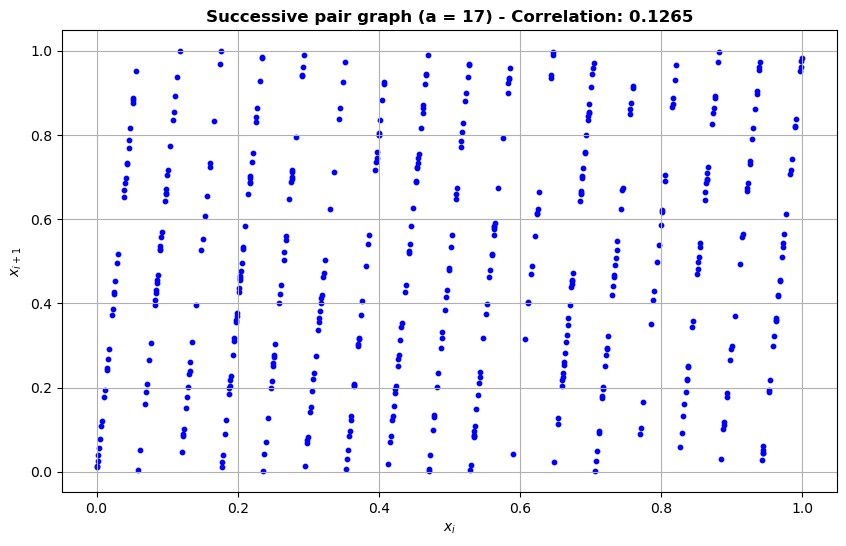

In [11]:
# Plot the pairs (x_i, x_{i+1}) for a = 17
plot_pairs(sequence, a)

<br>

When $a = 17$, when plotting the pairs $x_i$ and $x_{i+1}$, the points align in **17 equally spaced straight lines**. This pattern occurs because of the specific structure of the multiplicative congruential generator, where certain values ​​of $a$ and $m$ cause the generated pseudorandom numbers to follow specific paths in coordinate space.

This pattern can reduce the effectiveness of the generator by producing numbers that are not sufficiently random for certain applications.

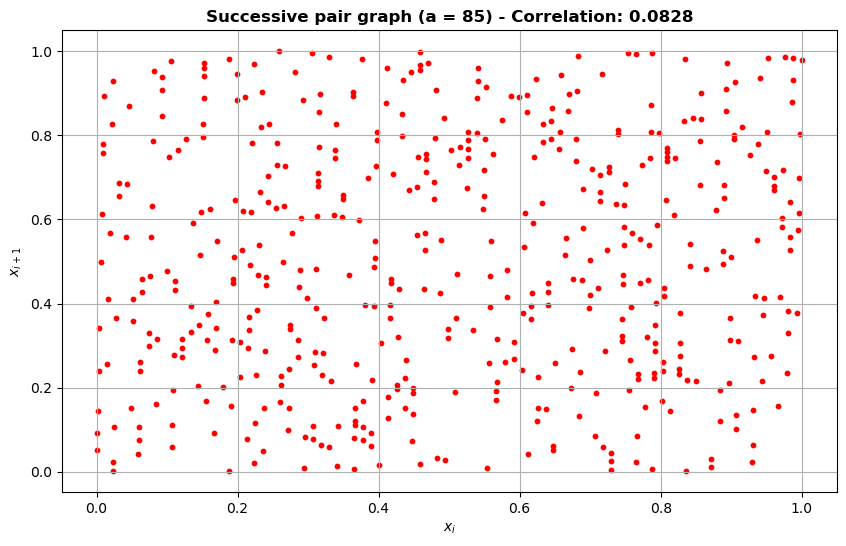

In [12]:
# Generate the sequence with a = 85
a = 85
sequence_85 = congruential_method(m, a, X0, n_iterations, decimal=True)

# Plot the pairs (x_i, x_{i+1}) for a = 85
plot_pairs(sequence_85, a, color='red')

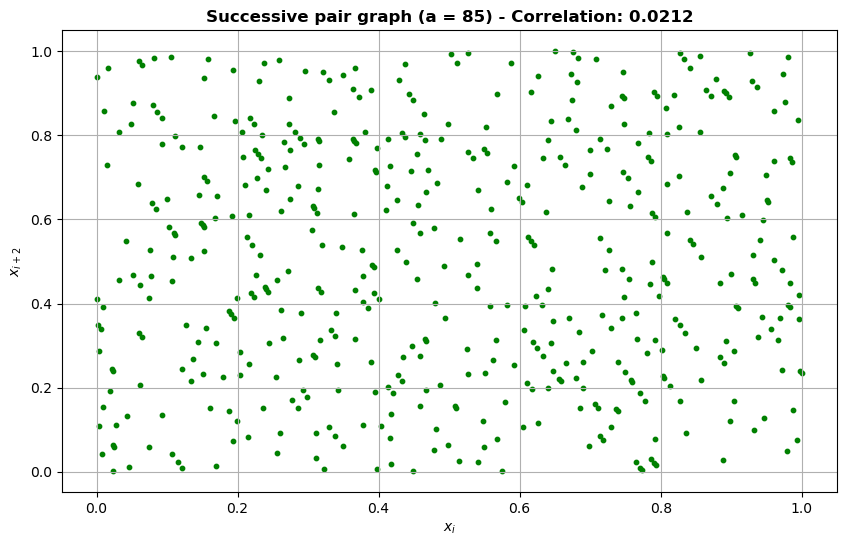

In [13]:
# Plot the pairs (x_i, x_{i+2}) for a = 85
plot_pairs(sequence_85, a, shift=2, color='green')

<br>

With $a = 85$, the correlation is even weaker (0.083 for $x_{i+1}$ vs. $x_i$, and 0.021 for $x_{i+2}$ vs. $x_i$) compared to $a = 17$ (0.127 for $x_{i+1}$ vs. $x_i$). The points are more dispersed and do not form such well-defined lines as in the case of $a = 17$, indicating a greater appearance of randomness.

Overall, the low correlations observed suggest that the generated numbers are not strongly related, which is desirable in a pseudorandom number generator. However, the presence of lines suggests that, although the numbers are not highly correlated, there is structural dependency due to the specific parameters used.

<br>

---

<p><h4> <b>Plus</b> </h4></p> 

<i> Demonstrate that the middle-square method using numbers of 2n digits in base b has the following disadvantage: if the sequence includes any number whose most significant n digits are zero, the successive numbers will become smaller until zero occurs repeatedly. </i>

<br>

- The number generated by the middle-square method at each step is determined by:

$$X_{i+1} = \text{middle}_{2n}\left( X_i^2 \right)$$

- Suppose that at some step, $X_i$ has its most significant $n$ digits as zeros. This means that:

    $$X_i = b^n \times k$$

    Where $k$ is a number of $n$ digits or less, and $b$ is the base of the numerical system being used.

- When $X_i$ is squared, we get:

    $$X_i^2 = (b^n \times k)^2 = b^{2n} \times k^2$$

    The result $X_i^2$ is a number of up to $4n$ digits. This number can be decomposed as:

    $$X_i^2 = b^{2n} \times k^2 = \text{(2n digits of zeros)} + \text{(the square of } k)$$

    If $k$ is sufficiently small, then $k^2$ will also be small, and therefore the resulting number $X_i^2$ will have many zeros in the first $2n$ digits.

- When extracting the $2n$ middle digits of $X_i^2$, since $k^2$ is small, it is possible that those $2n$ digits consist mostly of zeros, leaving a number even smaller than $X_i$.

    In other words, if $X_i$ has its most significant $n$ digits as zeros, then $X_{i+1}$ could be even smaller because the extraction of the middle $2n$ digits of $X_i^2$ will focus on the zeros appearing in the square.

- This process repeats:

    - As $X_{i+1}$ becomes smaller, its most significant $n$ digits also tend to be zeros.
    - As a result, $X_{i+2}$ will be even smaller.
    - Eventually, the sequence reaches a point where $X_i$ becomes 0, and from that moment, all successive numbers will be 0. (Knuth, D. E., 1997)

Therefore, the disadvantage of the middle-square method is that if at any point in the sequence $X_i$ has its most significant $n$ digits as zeros, the process tends to generate successively smaller numbers until the sequence collapses to zero and remains at zero indefinitely. This occurs because the square of a small number compared to $b^n$ results in an even smaller number, and this cycle inevitably leads to repetitive zeros.

<br>

---

<p><h4> <b>References</b> </h4></p> 

- Feller, W. (1968). *An Introduction to Probability Theory and Its Applications (Vol. 1, 3rd ed., pp. 160-162)*. John Wiley & Sons.
- Knoll, G. F. (2010). *Radiation Detection and Measurement (4th ed., pp. 78-80)*. John Wiley & Sons.
- Knuth, D. E. (1997). *The Art of Computer Programming, Volume 2: Seminumerical Algorithms (3rd ed., pp. 10-11)*. Addison-Wesley.
- Tversky, A., & Kahneman, D. (1974). *Judgment under Uncertainty: Heuristics and Biases*. *Science*, 185(4157), 1124-1131.